# Case Study on ANOVA

# Submitted by Mohammed Ihsan P

XYZ Company has offices in four different zones. The company wishes to investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [18]:
#import data set
data = pd.read_csv('Sales_data_zone_wise.csv')

In [4]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [7]:
data.shape

(29, 5)

In [65]:
data.isna().sum()

Month          0
Zone - A       0
Zone - B       0
Zone - C       0
Zone - D       0
Total_sales    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [9]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [10]:
data['Zone - A'].mean()

1540493.1379310344

# The mean sales generated by each zone.

In [29]:
data1=data.drop('Month',axis=1)

In [53]:
#mean sales generated by each zone
zone_mean = data1.mean().round(2)
zone_mean

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

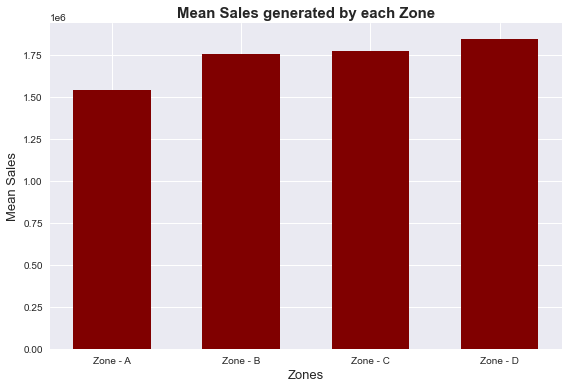

In [59]:
name = data1.columns
mean = data1.mean().round(2)

plt.bar(name, mean, color ='maroon',width = 0.6)
plt.xlabel("Zones",fontsize=13)
plt.ylabel("Mean Sales",fontsize=13)
plt.title("Mean Sales generated by each Zone", fontsize=15, fontweight ='bold')
plt.tight_layout()
plt.show()

Insights-:

    1- Zone-D has highest mean sales.
    2- Zone-A has lowest mean sales.

# Total sales generated by all the zones for each month.

In [100]:
#calculating total sales from the dataset
data['Total_sales']=data.sum(axis=1)
tot=data[['Month','Total_sales']]
tot

,Month,Total_sales
0,Month - 1,147473424
1,Month - 2,150198363
2,Month - 3,135994719
3,Month - 4,171663429
4,Month - 5,125901888
5,Month - 6,150179127
6,Month - 7,153029268
7,Month - 8,164142279
8,Month - 9,140771295
9,Month - 10,149692410


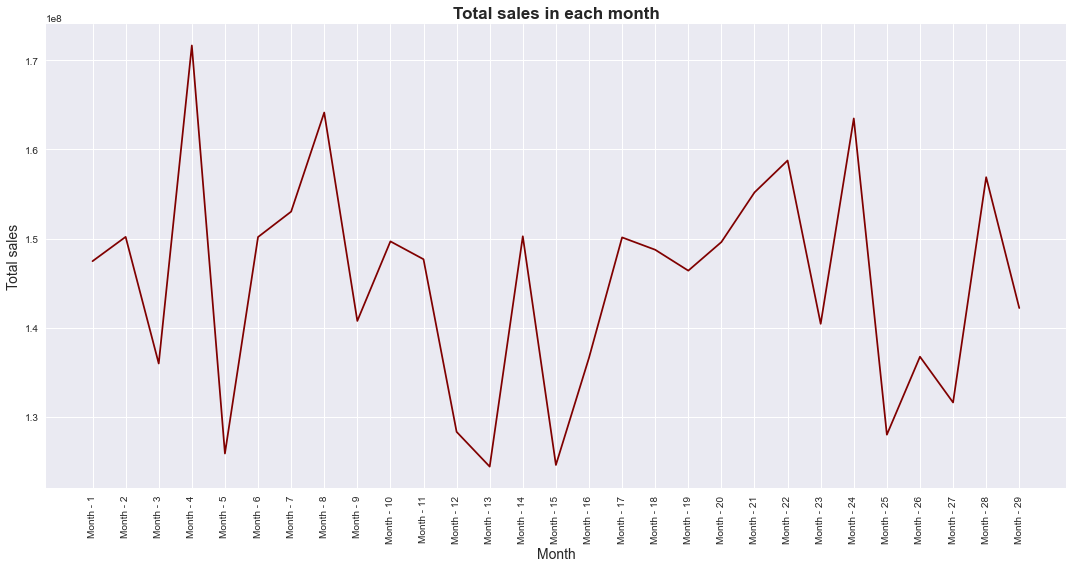

In [102]:
plt.figure(figsize=(15,8))
plt.plot(data['Month'],data['Total_sales'],color ='maroon')
plt.title('Total sales in each month', fontsize=17,fontweight ='bold')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total sales',fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insights -:
    
    1- Highest Sale was in Month-4 and is 171663429.
    2- Lowest Sale was in Month-13 and is 124433904.

# Check whether all the zones generate the same amount of sales.

Here, we need to test using one way anova

Let,

Null hypothesis ($H_{0}$) :- All the zones generate same amount of sales
    
Alternative hypothesis ($H_{a}$) :- All the zones generate different amount of sales
    
set significance level, alpha as 0.05

if p value <0.05, we could reject the Null hypothesis and accept the Alternative hypothesis.

if p value >0.05, we could accept the null hypothesis and reject the Alternative hypothesis.

In [108]:
#test using one way anova
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print('p value: %.3f' %(pvalue))

# comparing p value with significant level 0.05
if pvalue<0.05: 
    print('All the zones generate different amount of sales')
else:
    print(' All the zones generate same amount of sales')

p value: 0.001
All the zones generate different amount of sales


Since the p-value is less than 0.05, We could reject the null hypothesis. So we could say that All the zones generate different amount of sales.